## Visualize higher dimension data

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
X.shape

(569, 30)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(2)
X_2d = pca.fit_transform(X)

In [ ]:
X_2d.shape, X.shape

((569, 2), (569, 30))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

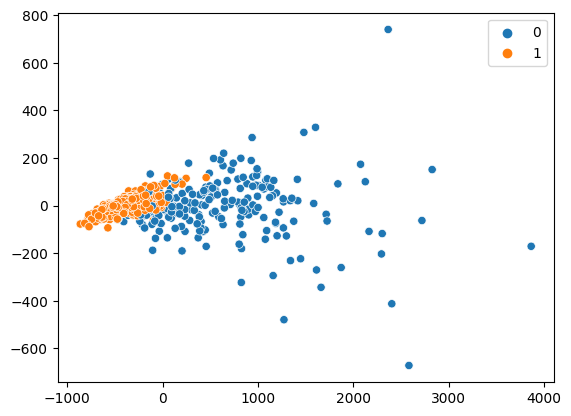

In [ ]:
sns.scatterplot(x = X_2d[:, 0], y = X_2d[:,1], hue=y)

In [ ]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

## Removing noise & redundant features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, stratify=y, random_state=4)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9934065934065934, 0.9736842105263158)

In [ ]:
lr.coef_

array([[-0.3942077 , -0.65578931, -0.40612769, -0.45893713, -0.07894017,
         0.53919658, -0.71633935, -0.74107761,  0.10822862,  0.31469543,
        -1.22980234,  0.28889372, -0.81105534, -0.99603726, -0.25126927,
         0.58282329,  0.21411101, -0.37656358,  0.27809396,  0.54148745,
        -0.87693453, -1.09727007, -0.75589588, -0.91134601, -0.90085109,
         0.05387397, -0.94344992, -0.96402171, -1.08434512, -0.18936907]])

We will keep only the features where absolute value of coefficent > 0.5

In [ ]:
to_keep = np.absolute(lr.coef_) > 0.5
to_keep.sum()

17

In [ ]:
to_keep

array([[False,  True, False, False, False,  True,  True,  True, False,
        False,  True, False,  True,  True, False,  True, False, False,
        False,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True, False]])

In [ ]:
X_train_ = pd.DataFrame(X_train).loc[:,to_keep[0]].values
X_test_ = pd.DataFrame(X_test).loc[:,to_keep[0]].values
X_train_.shape, X_test_.shape

((455, 17), (114, 17))

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_, y_train)
lr.score(X_train_, y_train), lr.score(X_test_, y_test)

(0.9912087912087912, 0.9736842105263158)

## Large Number of Dimensions

Textual data is very high dimensional, so lets use one.





In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
spam = pd.read_csv("/content/spam.csv")
spam.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = spam['text']
y = spam['class']

In [ ]:
vect = CountVectorizer(ngram_range=(1,3), min_df=5, max_features=8000)
X_vec = vect.fit_transform(X).toarray(); X_vec[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_vec.shape

(5572, 4708)

5572 samples and each samples has 4708 features i.e 5572 * 4708 =2,62,32,976 values. Pretty BIG!

In [ ]:
%%time
nb = GaussianNB()
nb.fit(X_vec, y)
nb.score(X_vec, y)

CPU times: user 797 ms, sys: 396 ms, total: 1.19 s
Wall time: 1.68 s


0.9429289303661162

Less than 2 seconds. Naive bayes is amazingly fast, hence is recommended while working with textual data.

Let try a linear model.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_vec, y)
lr.score(X_vec, y)

CPU times: user 2.77 s, sys: 641 ms, total: 3.41 s
Wall time: 4.11 s


0.9962311557788944

very close to Naive bayes. Another algorithm to use when working with textual or high dimensional data.

Algorithms like SVM and KNN are very slow when you have very high dimensional data. We have already seen they takes a lot of time. We can use reduce the dimension of our data and then use these algorithms.

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=80)
svd.fit(X_vec)
X_svd = svd.transform(X_vec)

In [ ]:
X_svd.shape

(5572, 80)

from 4708 to 80 dimension. Lets train SVC on this,

In [ ]:
%%time
svc = SVC(gamma='auto')
svc.fit(X_svd, y)
svc.score(X_svd, y)

CPU times: user 786 ms, sys: 46.6 ms, total: 832 ms
Wall time: 784 ms


0.9752333094041636

Just took 1 second. This is really amazing, because if your try to train SVC on X_vec (4708 dimension) …

In [ ]:
%%time
svc = SVC(gamma="auto")
svc.fit(X_vec, y)
svc.score(X_vec, y)

CPU times: user 1min 22s, sys: 173 ms, total: 1min 23s
Wall time: 1min 23s


0.8659368269921034

it easily took almost 2 mins. Thats a great advantage in terms of time and compute. Also, you can see, we get better score with just 80 dimension.

So, now you can use SVM, KNN and other unfit algorithms.


